In [36]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle

In [5]:
db_conf = {
'uname' : 'root',
'password' : 'mariadb',
'host' : 'localhost',
'port' : '3306',
'database' : 'dw_sakila'
}


engine = create_engine(f"mariadb+mariadbconnector://{db_conf['uname']}:{db_conf['password']}@{db_conf['host']}:{db_conf['port']}/{db_conf['database']}")

sql_query = """SELECT
avg_rental_cost,
avg_hours_rented,
avg_hours_rental_allowed,
hours_length,
avg_replacement_cost,
actors_in_film,
total_actor_fame,
total_actor_influence,
num_rent,
rating
FROM ml_fact"""

df = pd.read_sql(sql_query, engine)

df.head(5)

,avg_rental_cost,avg_hours_rented,avg_hours_rental_allowed,hours_length,avg_replacement_cost,actors_in_film,total_actor_fame,total_actor_influence,num_rent,rating
0,1.598696,119.4545,144.0,1.4333,20.99,10,278.0,1108.0,23,PG
1,7.561429,135.1667,72.0,0.8000,12.99,4,109.0,398.0,7,G
2,3.156667,82.7500,168.0,0.8333,18.99,5,136.0,541.0,12,NC-17
3,3.990000,113.6364,120.0,1.9500,26.99,5,141.0,543.0,23,G
4,4.323333,170.0000,144.0,2.1667,22.99,5,141.0,492.0,12,G


In [8]:
df.describe()

,avg_rental_cost,avg_hours_rented,avg_hours_rental_allowed,hours_length,avg_replacement_cost,actors_in_film,total_actor_fame,total_actor_influence,num_rent
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,4.212839,119.787919,119.220942,1.922723,20.051780,5.493194,155.067016,590.855497,16.758115
std,1.817829,16.830422,33.726928,0.673840,6.058014,2.312736,66.046452,255.996364,6.682303
min,0.990000,45.857100,72.000000,0.766700,9.990000,1.000000,18.000000,83.000000,4.000000
25%,2.881177,109.250000,96.000000,1.333300,14.990000,4.000000,109.000000,411.500000,11.000000
50%,3.990000,120.428600,120.000000,1.900000,19.990000,5.000000,147.000000,557.000000,16.000000
75%,5.712222,130.250000,144.000000,2.491650,24.990000,7.000000,200.000000,767.000000,22.000000
max,8.671818,172.333300,168.000000,3.083300,29.990000,15.000000,440.000000,1710.000000,34.000000


In [10]:
scaler = StandardScaler()
df[['avg_rental_cost','avg_hours_rented','avg_hours_rental_allowed','hours_length','avg_replacement_cost','actors_in_film','total_actor_fame','total_actor_influence','num_rent']] = scaler.fit_transform(df[['avg_rental_cost','avg_hours_rented','avg_hours_rental_allowed','hours_length','avg_replacement_cost','actors_in_film','total_actor_fame','total_actor_influence','num_rent']])

df.describe()

,avg_rental_cost,avg_hours_rented,avg_hours_rental_allowed,hours_length,avg_replacement_cost,actors_in_film,total_actor_fame,total_actor_influence,num_rent
count,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02
mean,3.413209e-16,-2.715687e-16,-2.269273e-16,1.860060e-17,-5.542977e-16,-1.302042e-17,1.357843e-16,1.850759e-16,9.858315e-17
std,1.000524e+00,1.000524e+00,1.000524e+00,1.000524e+00,1.000524e+00,1.000524e+00,1.000524e+00,1.000524e+00,1.000524e+00
min,-1.773835e+00,-4.394991e+00,-1.400830e+00,-1.716474e+00,-1.661774e+00,-1.943822e+00,-2.076400e+00,-1.984878e+00,-1.910240e+00
25%,-7.329408e-01,-6.264514e-01,-6.888594e-01,-8.751807e-01,-8.359889e-01,-6.459778e-01,-6.978596e-01,-7.009845e-01,-8.621477e-01
50%,-1.226497e-01,3.808677e-02,2.311108e-02,-3.373907e-02,-1.020342e-02,-2.133629e-01,-1.222055e-01,-1.323192e-01,-1.135106e-01
75%,8.252529e-01,6.219430e-01,7.350815e-01,8.447486e-01,8.155820e-01,6.518668e-01,6.806804e-01,6.884348e-01,7.848539e-01
max,2.454200e+00,3.123684e+00,1.447052e+00,1.723236e+00,1.641367e+00,4.112786e+00,4.316391e+00,4.374011e+00,2.581583e+00


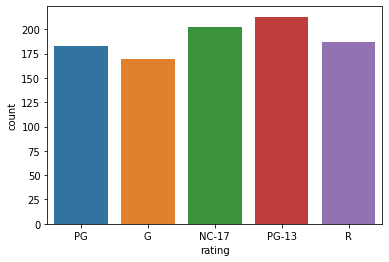

In [13]:
x = df.drop(['rating'], axis=1)
y = df['rating']
sns.countplot(x='rating', data=df)
plt.show()

In [32]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=38, stratify=y)

In [35]:
randFor_mod = RandomForestClassifier().fit(x_tr,y_tr)
knn_mod = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=2, metric='minkowski', n_jobs=-1).fit(x_tr,y_tr)
svm_mod = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42).fit(x_tr,y_tr)

prediction_randFor_mod = randFor_mod.predict(x_te)
prediction_knn_mod = knn_mod.predict(x_te)
prediction_svm_mod = svm_mod.predict(x_te)

print('Random Forest Model\n',classification_report(y_te, prediction_randFor_mod), end='\n\n')
print('KNN Model\n',classification_report(y_te, prediction_knn_mod), end='\n\n')
print('SVM Model\n',classification_report(y_te, prediction_svm_mod))

Random Forest Model
               precision    recall  f1-score   support

           G       0.13      0.12      0.12        34
       NC-17       0.17      0.20      0.18        40
          PG       0.31      0.24      0.27        37
       PG-13       0.17      0.19      0.18        43
           R       0.19      0.19      0.19        37

    accuracy                           0.19       191
   macro avg       0.19      0.19      0.19       191
weighted avg       0.19      0.19      0.19       191


KNN Model
               precision    recall  f1-score   support

           G       0.17      0.26      0.21        34
       NC-17       0.26      0.33      0.29        40
          PG       0.21      0.19      0.20        37
       PG-13       0.07      0.05      0.05        43
           R       0.24      0.16      0.19        37

    accuracy                           0.19       191
   macro avg       0.19      0.20      0.19       191
weighted avg       0.19      0.19      0.19 

In [ ]:
with open('machine_learning_model/randFor_mod.pkl','wb') as f:
    pickle.dump(randFor_mod,f)

with open('machine_learning_model/knn_mod.pkl','wb') as f:
    pickle.dump(knn_mod,f)

with open('machine_learning_model/svm_mod.pkl','wb') as f:
    pickle.dump(svm_mod,f)